### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.decomposition import PCA
from sklearn import cluster, manifold
from sklearn.cluster import cluster_optics_dbscan
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from umap.umap_ import UMAP
from sklearn.pipeline import make_pipeline
import matplotlib.cm as cm
import seaborn as sns


/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Preprocessing

In [2]:
data = pd.read_csv('../data/water_potability.csv')
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

#### NULLS

In [3]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
data[data.isnull().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
data_cleaned = data.dropna()
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [6]:
data_cleaned.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
data_cleaned.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


### Features

In [8]:
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [9]:
X = data_cleaned.drop(columns=['Potability'])


In [10]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


### Outliers

In [11]:
data_minmax = MinMaxScaler().fit_transform(X.values)
pca = PCA(0.95, whiten=True)
data_pca = pca.fit_transform(X.values) 

In [12]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(data_pca)
scores = lof.negative_outlier_factor_

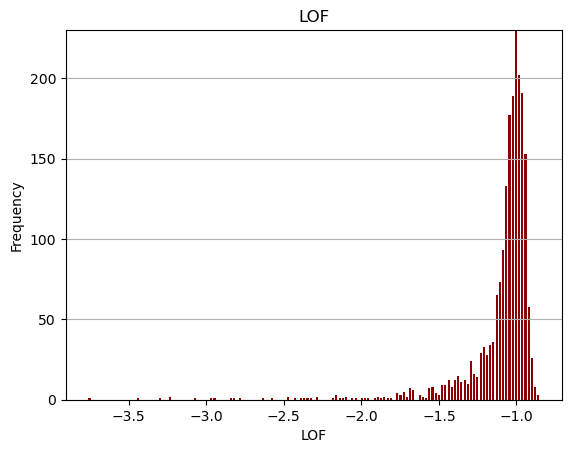

In [13]:
def plot_hist(X: pd.DataFrame, title: str) -> None:
    """ Funcion que genera un grafico de los valores de LOF del dataset """
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.65, color='darkred')
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    
plot_hist(scores, 'LOF')



In [14]:
# Dado el grafico anterior, diremos que un umbral de corte sera aproximadamente -1.85
def lof_threshold(v: float, scores: np.ndarray) -> float:
    ''' Retorna la contaminacion del medio '''
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold 

lof_threshold(-2.25, scores) # Contaminacion del medio



0.01093983092988563

In [15]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.01093983092988563)
labels = lof.fit_predict(X.values)

# Obtenemos los indices de los datos que son inliners
indices = list(np.where(labels==1)[0])

# Eliminamos los outliers del dataset 'data', filtrando el dataset solo con los datos
# que no son inliners (label = 1)
X = X.iloc[indices]


In [16]:
print(X.shape)

(1989, 9)


### Clustering
#### Normalization


In [17]:
X_ = MinMaxScaler().fit_transform(X.values)


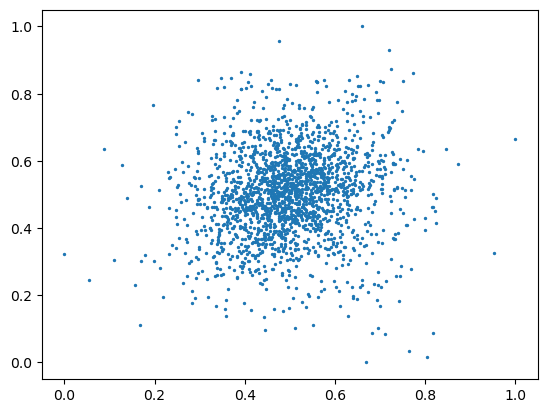

In [18]:
plt.scatter(X_[:, 0], X_[:, 1], s=2)
plt.show()

In [19]:
columns_data = data_cleaned.drop(columns='Potability').columns

In [20]:
columns_data

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [21]:
weights = {
    'Solids': 0.0136,
    'Conductivity': 0.0121,
    'Turbidity': 0.0097,
    'Hardness': 0.0041,
    'Sulfate': 0.0028,
    'Trihalomethanes': 0.0015,
    'Chloramines': 0.001,
    'ph': 0.0004,
    'Organic_carbon': 0.0001
}



X_df = pd.DataFrame(X_, columns=columns_data)  # replace your_column_names with the actual column names
X_df['contaminationLevel'] = X_df.apply(lambda row: sum(row[feature] * weight for feature, weight in weights.items()), axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_df['contaminationLevel'] = scaler.fit_transform(X_df[['contaminationLevel']])
X_df['contaminationLevel'] = X_df['contaminationLevel'].round(1)
X_df['contaminationLevel'].value_counts().sort_index()

/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


contaminationLevel
0.0      7
0.1     39
0.2    169
0.3    290
0.4    425
0.5    455
0.6    297
0.7    195
0.8     87
0.9     21
1.0      4
Name: count, dtype: int64

In [22]:
Y = X_df['contaminationLevel']

In [23]:
X_.shape

(1989, 9)

In [24]:
tsne_embed = manifold.TSNE(n_components=2, perplexity = 50, n_iter=500, n_iter_without_progress=150, n_jobs=10) 
projection_tsne = tsne_embed.fit_transform(X_, Y)


/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [25]:
umap_2d = UMAP(n_components = 2, min_dist = 1, n_neighbors= 50, n_jobs=8)
projection_umap = umap_2d.fit_transform(X_, Y)

In [26]:
def plot_embedding(X,title):
    _, ax = plt.subplots(figsize=(8, 8))

    for digit in np.unique(Y):
        ax.scatter(
            *X[Y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.3,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-8:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
    ax.set_title(title)
    ax.axis("off")

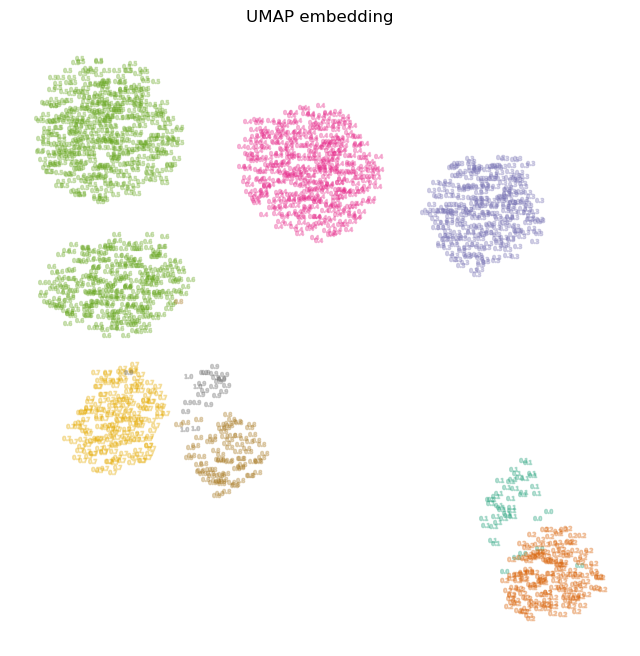

In [27]:
plot_embedding(projection_umap, "UMAP embedding")

In [28]:
range_n_clusters = [2,3,4,5,6,7,8,9]
# Esta funcion nos permitira graficar los silhoutte scores que toma cada dato segun al cluster que pertencen, segun 
# el valor de k que se escoja.
def function_k_means(X):
    for n_clusters in range_n_clusters:
        
        fig, ax = plt.subplots(figsize=(6, 12))
        

        ax.set_xlim([-0.1, 1.0])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4) # Utilizamos el algoritmo kmeans+ para escoger los centroides iniciales
        estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X)

        cluster_labels = estimator.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "Para k= ",
            n_clusters,
            "Silhouette score promedio: ",
            silhouette_avg,
        )

        
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax.set_title("Silhouette plot")
        ax.set_xlabel("Silhouette scores")
        ax.set_ylabel("Cluster ID")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks([]) 
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


        plt.suptitle(
            "Análisis Silhouette para k = %d"
            % n_clusters,
            fontsize=16,
            fontweight="bold",
        )

    plt.show()

Para k=  2 Silhouette score promedio:  0.50233996
Para k=  3 Silhouette score promedio:  0.54362637
Para k=  4 Silhouette score promedio:  0.58868045
Para k=  5 Silhouette score promedio:  0.6249249
Para k=  6 Silhouette score promedio:  0.6397624
Para k=  7 Silhouette score promedio:  0.64450693
Para k=  8 Silhouette score promedio:  0.5331723
Para k=  9 Silhouette score promedio:  0.512919


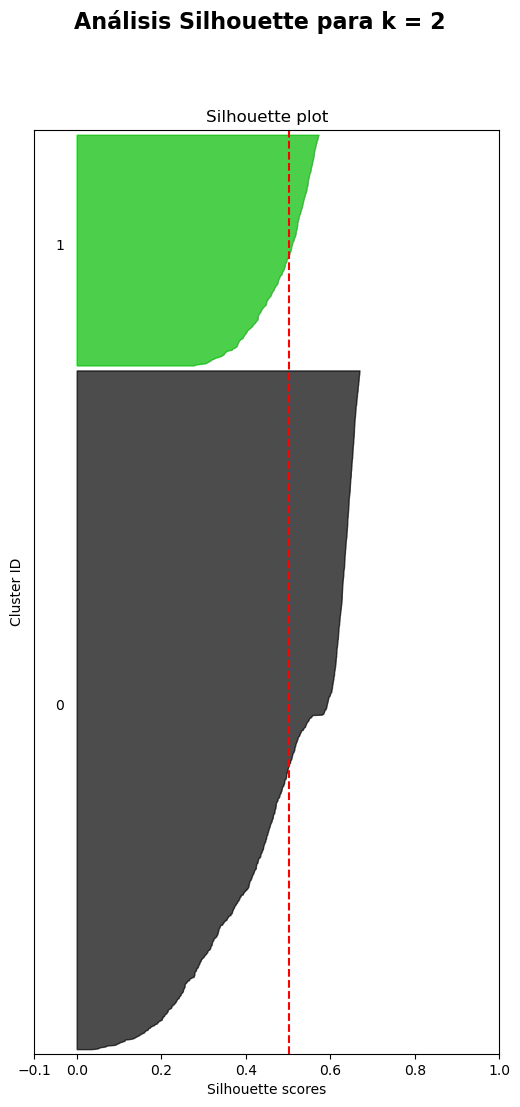

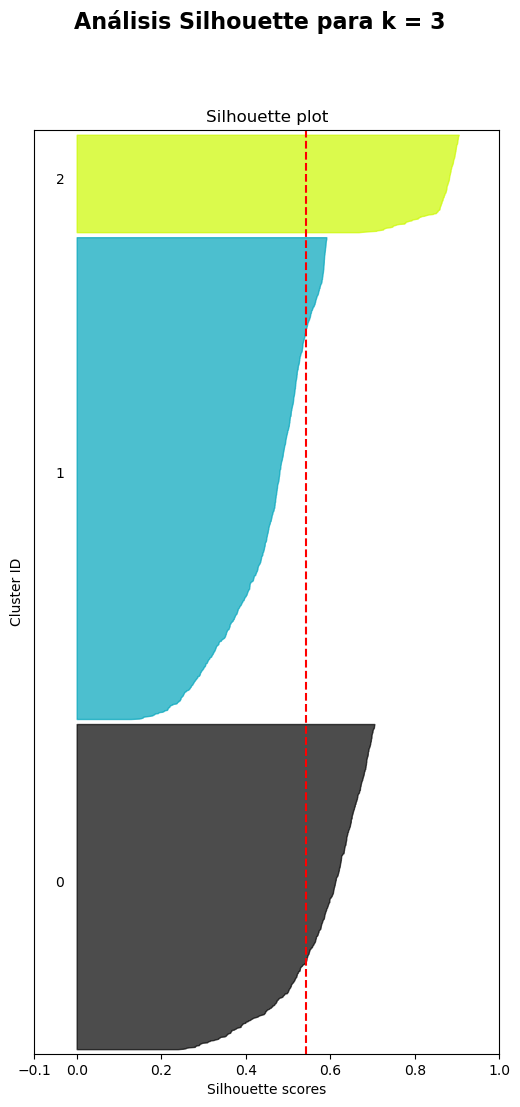

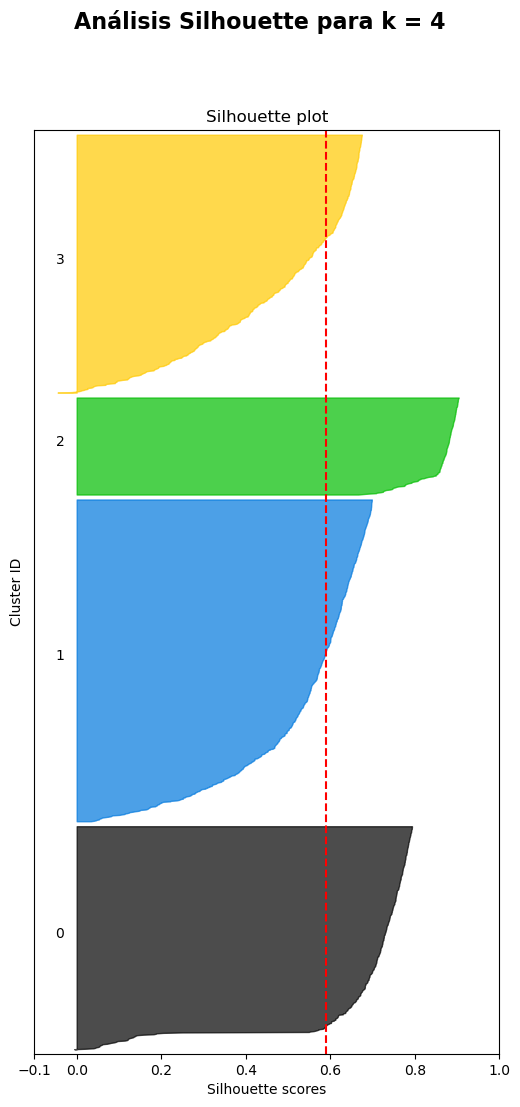

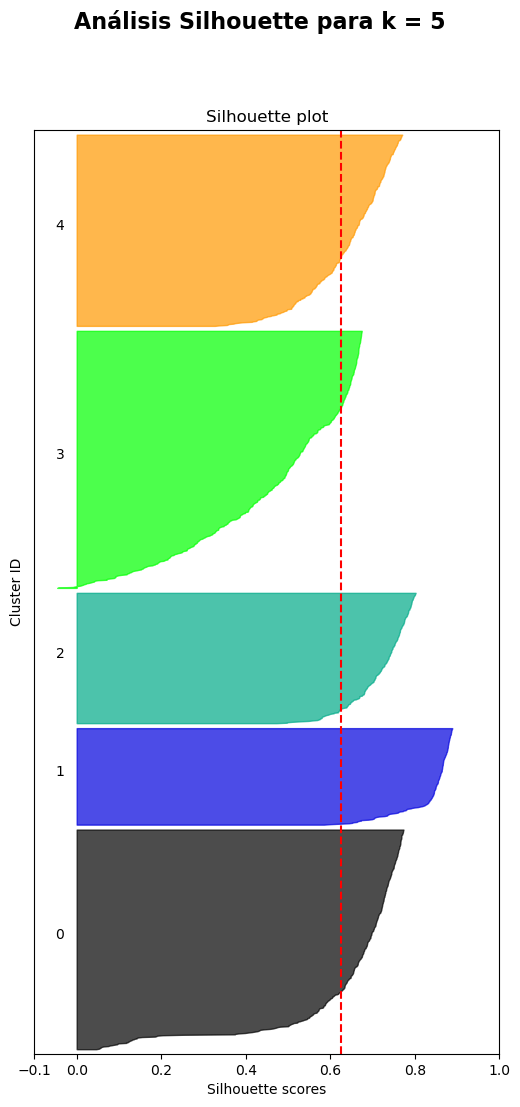

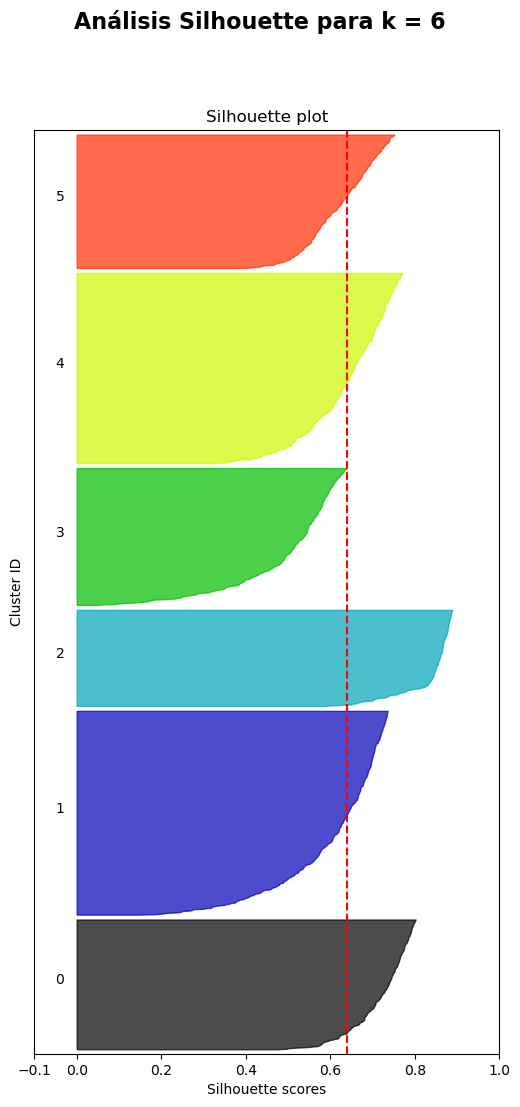

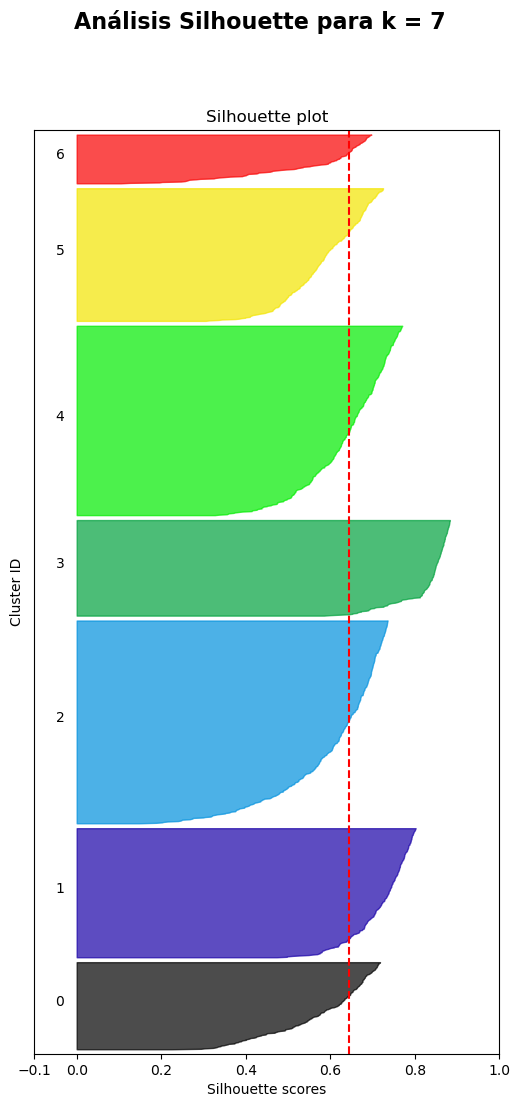

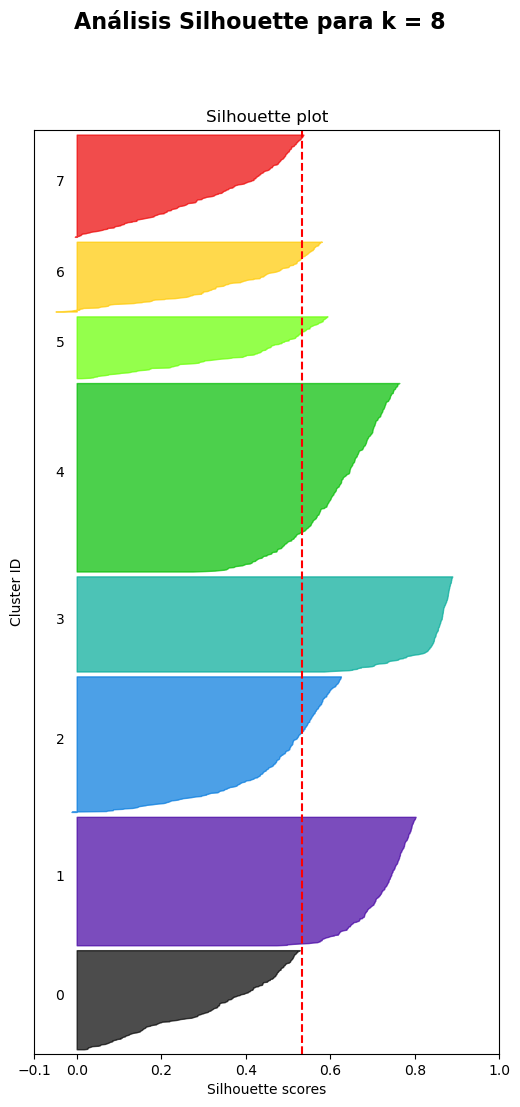

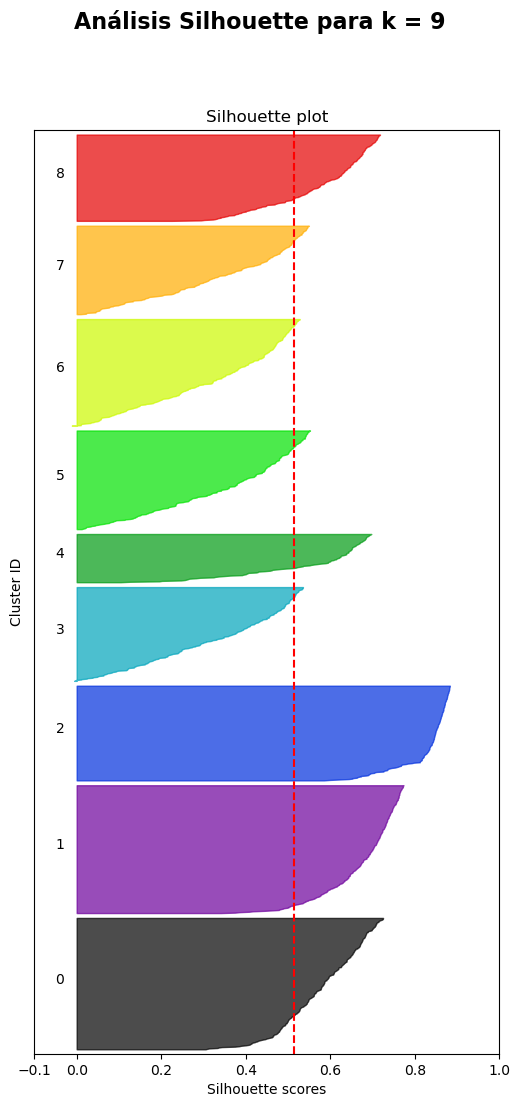

In [29]:
function_k_means(projection_umap)

```ANTES: Para k=  5 Silhouette score promedio:  0.6310486```

```AHORA: Para k=  7 Silhouette score promedio:  0.64450693 (Con pesos modificados)```



In [40]:

colors = sns.color_palette("hls", 7)
def plot_clusters(X, k, title):
    # Perform clustering
    kmeans = KMeans(n_clusters=k)
    cluster = kmeans.fit_predict(X)

    # Plot the clusters
    plt.figure(figsize=(12, 5))
    for i in range(k):
        subset = X[cluster == i]
        plt.scatter(subset[:, 0], subset[:, 1], c=[colors[i]], label=f'Cluster {i}', s=8)
       
    plt.title(title)
    plt.legend()
    plt.show()

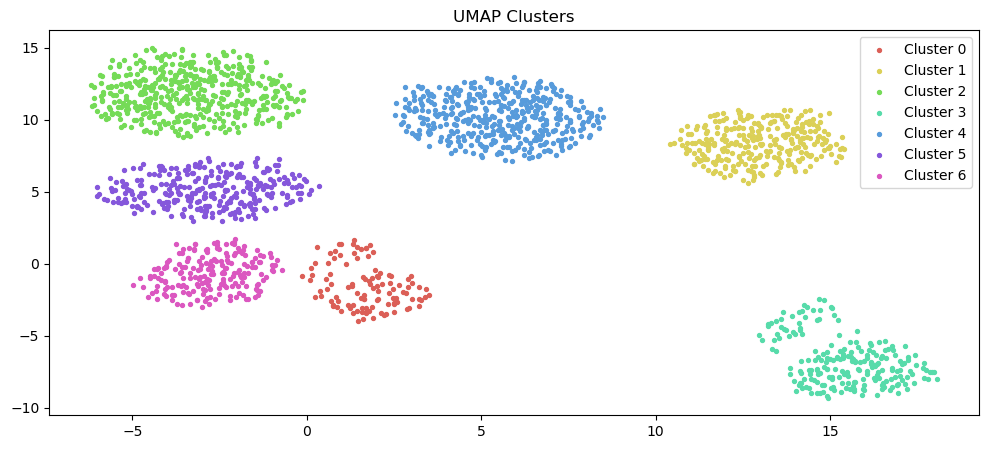

In [41]:
plot_clusters(projection_umap, 7, 'UMAP Clusters')


In [32]:
from sklearn.cluster import KMeans
from scipy.stats import f_oneway

# Realiza el clustering
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(X_)

# Itera a través de las características y realiza ANOVA para cada una
for feature_index in range(X_.shape[1]):
    feature_to_test = X_[:, feature_index]
    grouped_data = [feature_to_test[cluster_labels == i] for i in range(5)]
    
    # Realiza el ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)
    
    # Imprime los resultados
    print(f"Característica {feature_index + 1}:")
    print(f"ANOVA F-statistic: {f_statistic}")
    print(f"ANOVA p-value: {p_value}")
    print()


Característica 1:
ANOVA F-statistic: 13.203480703860388
ANOVA p-value: 1.283698867321205e-10

Característica 2:
ANOVA F-statistic: 80.40770957847556
ANOVA p-value: 2.618707750810294e-63

Característica 3:
ANOVA F-statistic: 500.3317123764714
ANOVA p-value: 1.5824778179153817e-298

Característica 4:
ANOVA F-statistic: 21.179898573076063
ANOVA p-value: 4.024151238003014e-17

Característica 5:
ANOVA F-statistic: 62.078187766051684
ANOVA p-value: 1.7498809778741493e-49

Característica 6:
ANOVA F-statistic: 497.2331297710797
ANOVA p-value: 3.466806406565857e-297

Característica 7:
ANOVA F-statistic: 3.801160828254166
ANOVA p-value: 0.004391647887502799

Característica 8:
ANOVA F-statistic: 90.89731718206419
ANOVA p-value: 4.937578071213064e-71

Característica 9:
ANOVA F-statistic: 377.4920102696912
ANOVA p-value: 6.639418295801079e-242



In [33]:
X_df = X_df.drop(columns='contaminationLevel')

In [34]:
X_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.587349,0.577747,0.406206,0.568199,0.587318,0.315323,0.654522,0.795029,0.630115
1,0.643654,0.441300,0.330582,0.439304,0.431910,0.387778,0.377248,0.202914,0.520358
2,0.388934,0.470876,0.532206,0.524364,0.486902,0.144622,0.249922,0.401487,0.219973
3,0.725820,0.715942,0.532225,0.521683,0.709573,0.151185,0.467200,0.658678,0.242428
4,0.610517,0.532588,0.249952,0.270288,0.409220,0.544868,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...
1984,0.636224,0.580511,0.292062,0.418063,0.441203,0.371283,0.310364,0.402799,0.627156
1985,0.470143,0.548826,0.316877,0.538273,0.413210,0.245226,0.565061,0.175889,0.395061
1986,0.817826,0.087434,0.690216,0.670774,0.261694,0.473300,0.563265,0.285745,0.578674
1987,0.424187,0.464092,0.483345,0.541633,0.550134,0.423807,0.397780,0.449156,0.440004


In [35]:
from sklearn.cluster import KMeans
import numpy as np

# Aplica K-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_)

# Obtiene los centroides de los clusters
centroids = kmeans.cluster_centers_

# Calcula la importancia de las características
feature_importance = np.var(centroids, axis=0)

# Crea un diccionario con las características y sus importancias
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importance)}

# Ordena las características por importancia
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Imprime las características más influyentes
for feature, importance in sorted_features:
    print(f'{feature}: {importance}')



Solids: 0.013832407355084213
Conductivity: 0.012042655898176588
Turbidity: 0.01094386877419133
Sulfate: 0.002404587207799256
Trihalomethanes: 0.002063588550439974
Hardness: 0.0016624291660303446
Chloramines: 0.0013789513530377084
Organic_carbon: 0.0005918449971398778
ph: 0.0003296799007952796
